#### 1. R语言的mahalannobis函数返回的马氏距离的平方
- ##### R关于马氏距离的函数
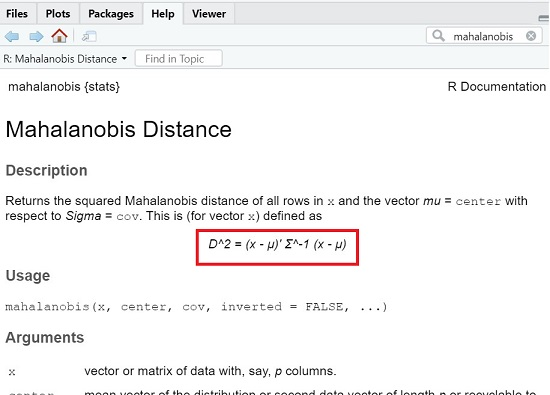
- ##### 很显然，R语言中各种判别算法都是使用马氏距离的平方。


- ##### 实验证明，如果使用真实马氏距离，即开平方的马氏距离，各种判别算法的准确率会显著降低。

In [2]:
###使用iris计算马氏距离
data <- iris[1:4]
#m = mean(data)
m <- colMeans(data)
cov1 <- cov(data)
maha <- mahalanobis(data,m,cov1)
maha[1:20]

[1] 2.134468 2.849119 2.081339 2.452382 2.462155 3.883418 2.862108 1.833300
 [9] 3.384073 2.375218 3.283107 2.774798 2.613298 3.603432 8.737518 9.712790
[17] 5.760588 2.321389 4.499690 3.438866

In [3]:
###R语言计算马氏距离平方的代码
x=x <- sweep(data, 2L, m)
x<-as.matrix(x)
###只显示前20个
#%*%求点积， *是逐元素相乘
#下面两种算法结果相同
rowSums(x %*% solve(cov1) * x)[1:20]
diag(x %*% solve(cov1) %*% t(x))[1:20]

[1] 2.134468 2.849119 2.081339 2.452382 2.462155 3.883418 2.862108 1.833300
 [9] 3.384073 2.375218 3.283107 2.774798 2.613298 3.603432 8.737518 9.712790
[17] 5.760588 2.321389 4.499690 3.438866

[1] 2.134468 2.849119 2.081339 2.452382 2.462155 3.883418 2.862108 1.833300
 [9] 3.384073 2.375218 3.283107 2.774798 2.613298 3.603432 8.737518 9.712790
[17] 5.760588 2.321389 4.499690 3.438866

#### 2. 二分类和多分类贝叶斯判别

In [17]:
###贝叶斯多分类判别
distinguish.bayes<-function
   (TrnX, TrnG, p=rep(1, length(levels(TrnG))), 
    TstX = NULL, var.equal = FALSE){
   if ( is.factor(TrnG) == FALSE){
       mx<-nrow(TrnX); mg<-nrow(TrnG)
       TrnX<-rbind(TrnX, TrnG)
       TrnG<-factor(rep(1:2, c(mx, mg)))
   }
   if (is.null(TstX) == TRUE) TstX<-TrnX
   if (is.vector(TstX) == TRUE)  TstX<-t(as.matrix(TstX))
   else if (is.matrix(TstX) != TRUE)
      TstX<-as.matrix(TstX)
   if (is.matrix(TrnX) != TRUE) TrnX<-as.matrix(TrnX)

   nx<-nrow(TstX)
   blong<-matrix(rep(0, nx), nrow=1, dimnames=list("blong", 1:nx))
   g<-length(levels(TrnG))
   mu<-matrix(0, nrow=g, ncol=ncol(TrnX))
   for (i in 1:g)
      mu[i,]<-colMeans(TrnX[TrnG==i,]) 
   D<-matrix(0, nrow=g, ncol=nx)
   if (var.equal == TRUE  || var.equal == T){
      for (i in 1:g){
         d2 <- mahalanobis(TstX, mu[i,], var(TrnX))
         D[i,] <- d2 - 2*log(p[i])
      }
   }
   else{
      for (i in 1:g){
         S<-var(TrnX[TrnG==i,])
         d2 <- mahalanobis(TstX, mu[i,], S)
         D[i,] <- d2 - 2*log(p[i])-log(det(S))
      }
   }
   for (j in 1:nx){
      dmin<-Inf
      for (i in 1:g)
          if (D[i,j]<dmin){
             dmin<-D[i,j]; blong[j]<-i
      }
   }
   blong
}



In [19]:
###二分类贝叶斯判别
discriminiant.bayes<-function
   (TrnX1, TrnX2, rate=1, TstX = NULL, var.equal = FALSE){
   if (is.null(TstX) == TRUE) TstX<-rbind(TrnX1,TrnX2)
   if (is.vector(TstX) == TRUE)  TstX<-t(as.matrix(TstX))
   else if (is.matrix(TstX) != TRUE)
      TstX<-as.matrix(TstX)
   if (is.matrix(TrnX1) != TRUE) TrnX1<-as.matrix(TrnX1)
   if (is.matrix(TrnX2) != TRUE) TrnX2<-as.matrix(TrnX2)

   nx<-nrow(TstX)
   blong<-matrix(rep(0, nx), nrow=1, byrow=TRUE, 
         dimnames=list("blong", 1:nx))
   mu1<-colMeans(TrnX1); mu2<-colMeans(TrnX2) 
   if (var.equal == TRUE  || var.equal == T){
      S<-var(rbind(TrnX1,TrnX2)); beta<-2*log(rate)
      w<-mahalanobis(TstX, mu2, S)-mahalanobis(TstX, mu1, S)
   }
   else{
      S1<-var(TrnX1); S2<-var(TrnX2)
      beta<-2*log(rate)+log(det(S1)/det(S2))
      w<-mahalanobis(TstX, mu2, S2)-mahalanobis(TstX, mu1, S1)
   }
   
   for (i in 1:nx){
      if (w[i]>beta)
          blong[i]<-1
      else
          blong[i]<-2
   }
   blong
}


In [31]:
###二分类贝叶斯判别示例
TrnX1<-matrix(
   c(24.8, 24.1, 26.6, 23.5, 25.5, 27.4, 
     -2.0, -2.4, -3.0, -1.9, -2.1, -3.1),
   ncol=2)
TrnX2<-matrix(
   c(22.1, 21.6, 22.0, 22.8, 22.7, 21.5, 22.1, 21.4, 
     -0.7, -1.4, -0.8, -1.6, -1.5, -1.0, -1.2, -1.3),
   ncol=2)

#### 样本协方差相同
results <- discriminiant.bayes(TrnX1, TrnX2, rate=8/6, var.equal=TRUE)
classes <- rep(c(1,2),c(6,8))
round(sum(results==classes)/length(classes),2)
which(results!=classes)
#### 样本协方差不同
discriminiant.bayes(TrnX1, TrnX2, rate=8/6)

[1] 0.93

[1] 4

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
blong,1,1,1,1,1,1,2,2,2,2,2,2,2,2


#### 3. R语言的二次判别分析

In [115]:
###使用qda计算鸢尾花的分类。
#head(iris)
library(MASS)
qda.fit=qda(iris$Species~iris$Sepal.Length+iris$Sepal.Width+
              iris$Petal.Length+iris$Petal.Width
            ,data=iris)
qda.class=predict(qda.fit,iris[1:4])$class

p<-sum(qda.class==iris$Species)/dim(iris)[1]
print(paste('二次判别对鸢尾花分类的准确率：',p))
which(qda.class!=iris$Species)

[1] "二次判别对鸢尾花分类的准确率： 0.98"


[1]  71  84 134

In [110]:
lda.fit=lda(iris$Species~iris$Sepal.Length+iris$Sepal.Width+
              iris$Petal.Length+iris$Petal.Width
            ,data=iris)
lda.class=predict(lda.fit,iris[1:4])$class

p1<-sum(lda.class==iris$Species)/dim(iris)[1]
print(paste('线性判别分析对鸢尾花分类的准确率：',p1))
which(lda.class!=iris$Species)

[1] "线性判别分析对鸢尾花分类的准确率： 0.98"


[1]  71  84 134

#### 4. 国民经济数据聚类分析 

The "ward" method has been renamed to "ward.D"; note new "ward.D2"

Warning message:
"'plclust' is deprecated.
Use 'plot' instead.
See help("Deprecated")"
Warning message:
"'plclust' is deprecated.
Use 'plot' instead.
See help("Deprecated")"


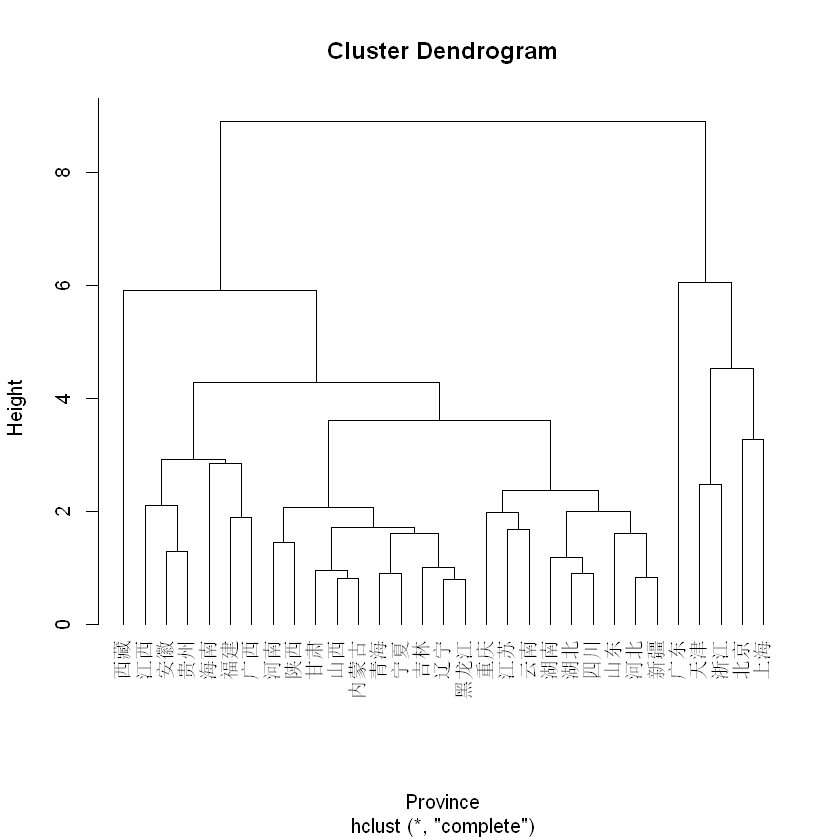

Warning message:
"'plclust' is deprecated.
Use 'plot' instead.
See help("Deprecated")"
Warning message:
"'plclust' is deprecated.
Use 'plot' instead.
See help("Deprecated")"


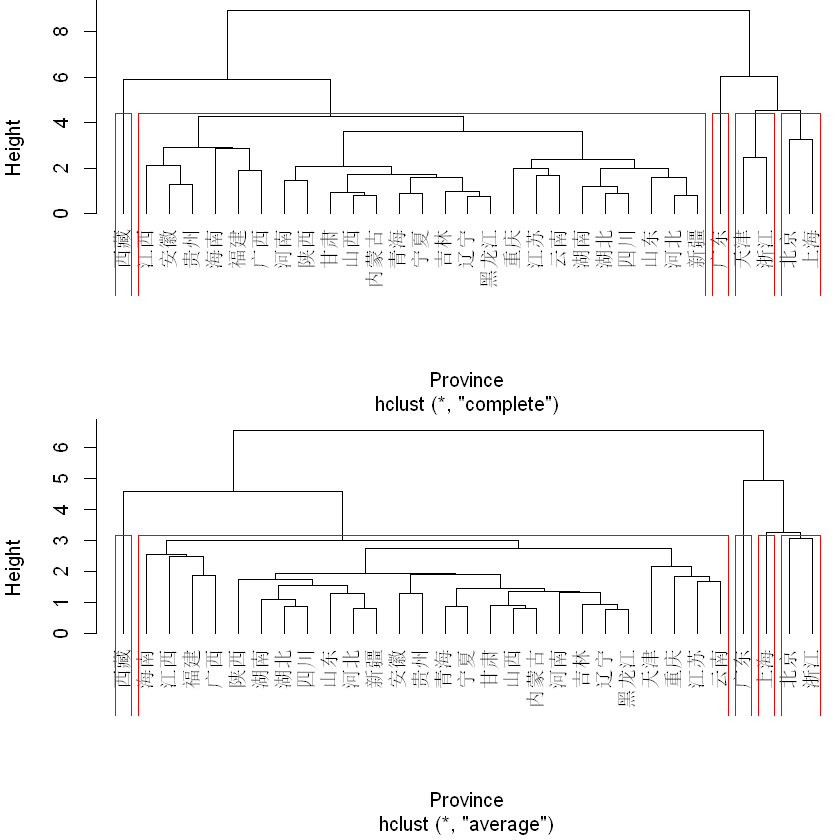

K-means clustering with 5 clusters of sizes 4, 3, 16, 1, 7

Cluster means:
          x1          x2         x3         x4          x5         x6
1  0.2029830 -1.53019285 -0.6594861 -1.0978219  0.05751333 -0.4270452
2  1.8790347  1.02836873  2.1203833  2.1727806  1.49972764  2.2232050
3 -0.6867323 -0.05815552 -0.4787096 -0.1598851 -0.57749718 -0.5070907
4  1.8042004 -1.12776493  0.9368961  1.2959544  3.90904835  1.6014419
5  0.3906401  0.72770263  0.4284646 -0.1235496  0.08595291  0.2215108
           x7         x8
1  0.33154520 -0.2336878
2  0.95830640  1.9453274
3 -0.49317064 -0.6033238
4  3.88031413  2.0187653
5 -0.02724055  0.3904549

Clustering vector:
  北京   天津   河北   山西 内蒙古   辽宁   吉林 黑龙江   上海   江苏   浙江 
     2      5      3      3      3      3      3      3      2      5      2 
  安徽   福建   江西   山东   河南   湖北   湖南   广东   广西   海南   重庆 
     3      1      1      5      3      3      5      4      1      1      5 
  四川   贵州   云南   西藏   陕西   甘肃   青海   宁夏   新疆 
     3      3      5   

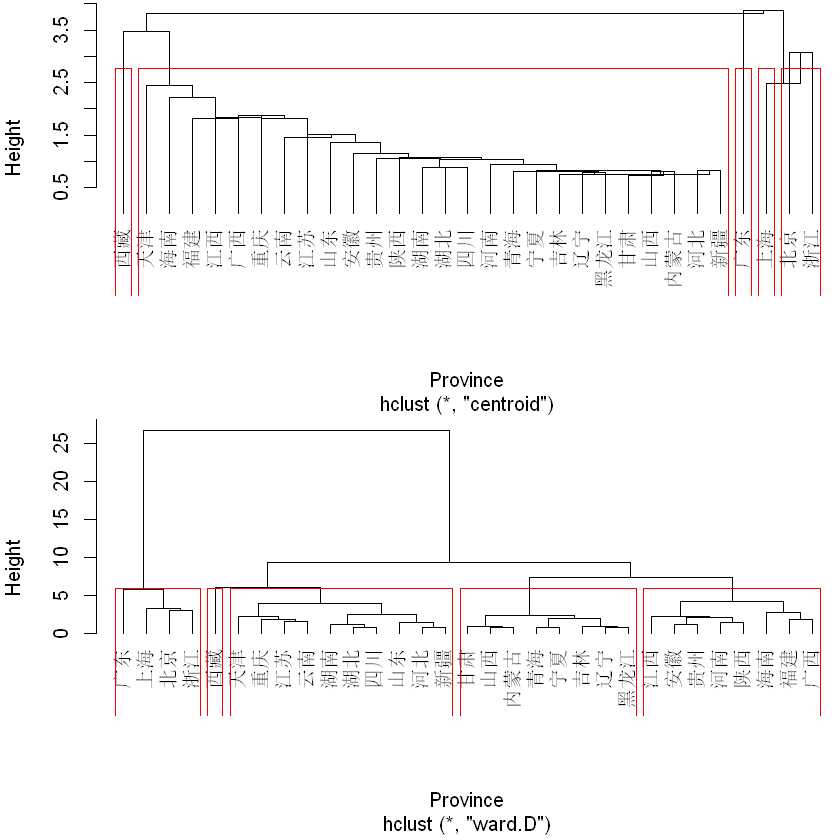

In [121]:
X<-data.frame(
   x1=c(2959.19, 2459.77, 1495.63, 1046.33, 1303.97, 1730.84, 
        1561.86, 1410.11, 3712.31, 2207.58, 2629.16, 1844.78, 
        2709.46, 1563.78, 1675.75, 1427.65, 1783.43, 1942.23, 
        3055.17, 2033.87, 2057.86, 2303.29, 1974.28, 1673.82, 
        2194.25, 2646.61, 1472.95, 1525.57, 1654.69, 1375.46, 
        1608.82), 
   x2=c(730.79, 495.47, 515.90, 477.77, 524.29, 553.90, 492.42, 
        510.71, 550.74, 449.37, 557.32, 430.29, 428.11, 303.65, 
        613.32, 431.79, 511.88, 512.27, 353.23, 300.82, 186.44, 
        589.99, 507.76, 437.75, 537.01, 839.70, 390.89, 472.98, 
        437.77, 480.99, 536.05),
   x3=c(749.41, 697.33, 362.37, 290.15, 254.83, 246.91, 200.49, 
        211.88, 893.37, 572.40, 689.73, 271.28, 334.12, 233.81, 
        550.71, 288.55, 282.84, 401.39, 564.56, 338.65, 202.72, 
        516.21, 344.79, 461.61, 369.07, 204.44, 447.95, 328.90, 
        258.78, 273.84, 432.46), 
   x4=c(513.34, 302.87, 285.32, 208.57, 192.17, 279.81, 218.36, 
        277.11, 346.93, 211.92, 435.69, 126.33, 160.77, 107.90, 
        219.79, 208.14, 201.01, 206.06, 356.27, 157.78, 171.79, 
        236.55, 203.21, 153.32, 249.54, 209.11, 259.51, 219.86, 
        303.00, 317.32, 235.82),
   x5=c(467.87, 284.19, 272.95, 201.50, 249.81, 239.18, 220.69, 
        224.65, 527.00, 302.09, 514.66, 250.56, 405.14, 209.70, 
        272.59, 217.00, 237.60, 321.29, 811.88, 329.06, 329.65, 
        403.92, 240.24, 254.66, 290.84, 379.30, 230.61, 206.65, 
        244.93, 251.08, 250.28),
   x6=c(1141.82, 735.97, 540.58, 414.72, 463.09, 445.20, 459.62, 
        376.82, 1034.98, 585.23, 795.87, 513.18, 461.67, 393.99, 
        599.43, 337.76, 617.74, 697.22, 873.06, 621.74, 477.17, 
        730.05, 575.10, 445.59, 561.91, 371.04, 490.90, 449.69, 
        479.53, 424.75, 541.30),
   x7=c(478.42, 570.84, 364.91, 281.84, 287.87, 330.24, 360.48, 
        317.61, 720.33, 429.77, 575.76, 314.00, 535.13, 509.39, 
        371.62, 421.31, 523.52, 492.60, 1082.82, 587.02, 312.93, 
        438.41, 430.36, 346.11, 407.70, 269.59, 469.10, 249.66, 
        288.56, 228.73, 344.85),
   x8=c(457.64, 305.08, 188.63, 212.10, 192.96, 163.86, 147.76, 
        152.85, 462.03, 252.54, 323.36, 151.39, 232.29, 160.12, 
        211.84, 165.32, 182.52, 226.45, 420.81, 218.27, 279.19, 
        225.80, 223.46, 191.48, 330.95, 389.33, 191.34, 228.19, 
        236.51, 195.93, 214.40),
   row.names = c("北京", "天津", "河北", "山西", "内蒙古", "辽宁", "吉林", 
                   "黑龙江", "上海", "江苏", "浙江", "安徽", "福建", "江西", 
                   "山东",  "河南", "湖北", "湖南", "广东", "广西", "海南", 
                   "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", 
                   "青海", "宁夏", "新疆")
)
Province<-dist(scale(X))
#scale(X)
hc1<-hclust(Province, "complete")
hc2<-hclust(Province, "average")
hc3<-hclust(Province, "centroid")
hc4<-hclust(Province, "ward")
plot(hc1,hang=-1)

opar<-par(mfrow=c(2,1), mar=c(5.2,4,0,0))
plclust(hc1,hang=-1)
re1<-rect.hclust(hc1,k=5,border="red")
plclust(hc2,hang=-1)
re2<-rect.hclust(hc2,k=5,border="red")
par(opar)

opar<-par(mfrow=c(2,1), mar=c(5.2,4,0,0))
plclust(hc3,hang=-1)
re3<-rect.hclust(hc3,k=5,border="red")
plclust(hc4,hang=-1)
re4<-rect.hclust(hc4,k=5,border="red")
par(opar)

kmeans(scale(X),5,nstart=20)
